# **Análisis exploratorio de datos**

## **1. Dataset**

➡️  **Nombre:** Lending Club Loan Data (2007–2020) \
➡️  **Fuente:** Kaggle Dataset - Lending Club \
➡️  **Tamaño:** 2'260.701 registros en 151 variables de estudio 

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats import chi2_contingency

In [3]:
# Cargar el dataset
file = r"C:\Users\Hp\MACHINE\MINI_PRY_1\data\data_lend.csv"
df = pd.read_csv(file, low_memory=False)

In [4]:
df.drop(columns =['total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'last_pymnt_amnt', 'last_fico_range_mean',
                  'payment_effiency', 'has_payment_plan', 'had_hardship', 'out_prncp',
                  'tax_liens', 'all_util', 'open_rv_12m', 'open_act_il', 'max_bal_bc', 'total_bal_il',
                  'acc_open_past_24mths'
                  ], inplace=True)

In [5]:
# Renombrar variables
variable_dict = {
    "prestamo": {
        "funded_amnt": "monto_aprobado",
        "int_rate": "tasa_interes",
        "installment": "cuota_mensual",
        "term_num": "plazo_meses",
        "purpose": "motivo_prestamo",
        "disbursement_method_num": "metodo_desembolso",
        "initial_list_status_num": "estado_inicial_listado",
        "application_type_num": "tipo_aplicacion",
        "loan_gap": "dif_monto_solicitado"
    },
    "prestatario": {
        "annual_inc": "ingreso_anual",
        "home_ownership": "tipo_vivienda",
        "emp_length_num": "antiguedad_laboral",
        "verification_status_num": "estado_verif_ingreso"
    },
    "historial_crediticio": {
        "fico_range_mean": "promedio_fico",
        "earliest_cr_line_year": "año_apertura_credito",
        "earliest_cr_line_month": "mes_apertura_credito",
        "mort_acc": "cuentas_hipotecarias",
        "total_acc": "total_cuentas_credito",
        "num_sats": "cuentas_abiertas",
        "num_bc_sats": "cuentas_tarjeta_credito",
        "revol_bal": "saldo_revolvente",
        "revol_util": "uso_credito_revolvente",
        "bc_util": "uso_tarjetas_credito",
        "tot_hi_cred_lim": "limite_credito_total"
    },
    "comportamiento_prestatario": {
        "mths_since_recent_inq": "meses_ultima_consulta",
        "mths_since_recent_bc": "meses_tarjeta_nueva",
        "mths_since_recent_revol_delinq": "meses_mora_revolvente",
        "num_tl_op_past_12m": "lineas_credito_12m",
        "pct_tl_nvr_dlq": "porcentaje_sin_moras"
    },
    "morosidad_riesgo": {
        "delinq_2yrs": "moras_2_year",
        "mths_since_last_delinq": "meses_ultima_mora",
        "delinq_amnt": "monto_mora",
        "num_tl_90g_dpd_24m": "lineas_90_dias_mora_24m",
        "num_tl_120dpd_2m": "lineas_120_dias_mora_2m",
        "chargeoff_within_12_mths": "castigos_12m",
        "collections_12_mths_ex_med": "cobranzas_12m",
        "acc_now_delinq": "cuentas_en_mora_actual",
        "tot_coll_amt": "monto_total_cobranzas",
        "pub_rec_bankruptcies": "quiebras_publicas",
        "had_settlement": "tuvo_acuerdo_pago"
    },
    "tecnicas_control": {
        "grade": "categoria_credito",
        "sub_grade_num": "subcategoria_credito",
        "issue_d_year": "año_emision_prestamo",
        "issue_d_month": "mes_emision_prestamo"
    }
}

In [6]:
# Combinar todos los subdiccionarios en uno solo
rename_map = {k: v for group in variable_dict.values() for k, v in group.items()}
# Renombrar columnas
df.rename(columns=rename_map, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 46 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   monto_aprobado           1345310 non-null  float64
 1   tasa_interes             1345310 non-null  float64
 2   cuota_mensual            1345310 non-null  float64
 3   categoria_credito        1345310 non-null  object 
 4   tipo_vivienda            1345310 non-null  object 
 5   ingreso_anual            1345310 non-null  float64
 6   motivo_prestamo          1345310 non-null  object 
 7   dti                      1344401 non-null  float64
 8   moras_2_year             1345310 non-null  float64
 9   meses_ultima_mora        1345310 non-null  float64
 10  saldo_revolvente         1345310 non-null  float64
 11  uso_credito_revolvente   1344453 non-null  float64
 12  total_cuentas_credito    1345310 non-null  float64
 13  cobranzas_12m            1345254 non-null 

📍  Se trabajarán _1'345.310_ de registros que, luego de un proceso de preprocesamiento, se han resumido en _59_ variables de interés. \
📍  De las variables, 56 son de tipo numérico y 3 de tipo String

## **2. Distribución de las variables de estudio**

## 2.1. Variable objetivo

☑️ Variable binaria: ``default``

*   0 = _Fully Paid_
*   1 = _Charged Off_ (default)

In [8]:
# Variables de interés
target = df['default']

In [9]:
# Calcular conteo absoluto y porcentual
abs_counts = target.value_counts()
pct_counts = target.value_counts(normalize=True) * 100
# Combinar en una sola tabla
table = pd.DataFrame({
    'Default': abs_counts.index.map({0: 'Fully Paid', 1: 'Charged Off'}),
    'Count': abs_counts.values,
    'Percentage': pct_counts.values
})
# Formatear porcentaje como string con símbolo %
table['Percentage'] = table['Percentage'].round(2).astype(str) + '%'
table

,Default,Count,Percentage
0,Fully Paid,1076751,80.04%
1,Charged Off,268559,19.96%


In [10]:
#Distribución de la variable objetivo
labels = ['Fully Paid', 'Charged Off']
values = table['Count'].values
colors = ['#4caf50', '#f44336']

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    marker=dict(colors=colors),
    hole=0.3,  # Dona
)])
fig.update_traces(
    textinfo='percent+label',
    pull=[0.05]*len(labels),
    textfont=dict(size=14, family='Sans-serif', color='white'),
)
fig.update_layout(
    legend_title_text='Categoría',
    title={
        'text': 'Distribución de la variable objetivo',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, family='Sans-serif', color='black', weight='bold')
    },
    showlegend=True
)
fig.show()

La distribución en la variable es 80% - 20%, siendo la mayoría de registros correspondientes a prestamos full pagados.

In [11]:
# Prueba de proporción 
from statsmodels.stats.proportion import proportions_ztest

count = df['default'].sum()        # número de impagos
nobs = df.shape[0]                 # total de observaciones
value = 0.3                       # proporción hipotética

stat, pval = proportions_ztest(count, nobs, value)
print("Prueba de hipótesis para la proporción hipotética del 30% esperado de impagos ")
print("z =", stat, "p-value =", pval)

real_prop = count / nobs
print(f"Proporción observada: {real_prop:.3f}")

Prueba de hipótesis para la proporción hipotética del 30% esperado de impagos 
z = -291.25730076462725 p-value = 0.0
Proporción observada: 0.200


La proporción de impagos observada en los registros es del 20%, mientras que la proporción hipotética planteada fue del 50%.
La diferencia entre ambas proporciones es estadísticamente significativa, como lo indica el p-valor ≈ 0, lo que permite rechazar la hipótesis nula.
El estadístico z negativo confirma que la proporción observada está significativamente por debajo de la proporción hipotética


## 2.2. Valores faltantes

In [12]:
# Resumen de valores faltantes
# Missing map

# Conteo y porcentaje de nulos
missing = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

# Tabla ordenada
missing_table = pd.DataFrame({
    "Nulos": missing,
    "Porcentaje": missing_percent
})
missing_table = missing_table[missing_table["Nulos"] > 0] \
    .sort_values("Porcentaje", ascending=False)
missing_table

,Nulos,Porcentaje
lineas_120_dias_mora_2m,117401,8.73
porcentaje_sin_moras,67681,5.03
monto_total_cobranzas,67527,5.02
lineas_90_dias_mora_24m,67527,5.02
lineas_credito_12m,67527,5.02
limite_credito_total,67527,5.02
uso_tarjetas_credito,61912,4.60
cuentas_tarjeta_credito,55841,4.15
cuentas_abiertas,55841,4.15
cuentas_hipotecarias,47281,3.51


In [13]:
# Listado de imputaciones
imputar_cero = [
    "lineas_120_dias_mora_2m",
    "lineas_90_dias_mora_24m",
    "monto_total_cobranzas",
    "quiebras_publicas",
    "cobranzas_12m",
    "castigos_12m",
    "cuentas_tarjeta_credito",
    "cuentas_abiertas",
    "cuentas_hipotecarias"
]
imputar_mediana = [
    "porcentaje_sin_moras",
    "limite_credito_total",
    "lineas_credito_12m",
    "uso_tarjetas_credito",
    "dti",
    "uso_credito_revolvente"
]


for col in imputar_cero:
    if col in df.columns:
        df[col] = df[col].fillna(0)

for col in imputar_mediana:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

missing_summary = df[imputar_cero + imputar_mediana].isnull().sum()
print(missing_summary[missing_summary > 0])

Series([], dtype: int64)


## 2.3. Correlación de variables 

Matriz de correlación de Spearman entre la variable objetivo y aquellas con indice mayor a 25%.

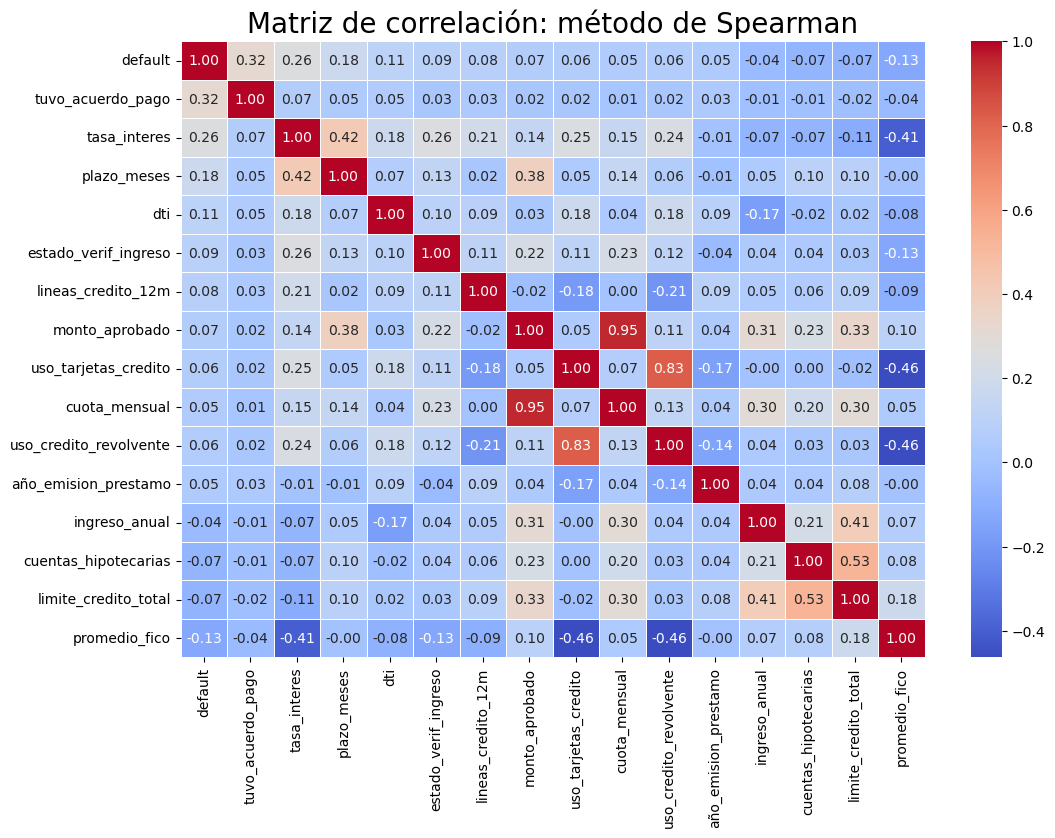

In [14]:
# Correlación de Spearman
corr = df.corr(numeric_only=True, method='spearman')["default"].sort_values(ascending=False)
corr_5= corr[corr.abs() > 0.05]
plt.figure(figsize=(12, 8))
sns.heatmap(df[corr_5.index].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación: método de Spearman', fontsize=20)   
plt.show()

Variables con alta correlación (>80%) entre ellas

In [15]:
# Calculamos la matriz de correlación de Spearman
corr_matrix = df.corr(numeric_only=True, method='spearman')

# Nos quedamos solo con la parte superior de la matriz para evitar duplicados
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Filtramos pares con correlación mayor a 0.75 (en valor absoluto)
high_corr = upper.stack().reset_index()
high_corr.columns = ['Variable1', 'Variable2', 'Spearman_corr']
high_corr = high_corr[high_corr['Spearman_corr'].abs() > 0.75]

# Ordenamos por correlación absoluta descendente
high_corr = high_corr.reindex(high_corr['Spearman_corr'].abs().sort_values(ascending=False).index)

print(f"Se encontraron {len(high_corr)} pares de variables con correlación > 0.75:\n")
high_corr

Se encontraron 4 pares de variables con correlación > 0.75:



,Variable1,Variable2,Spearman_corr
1,monto_aprobado,cuota_mensual,0.969819
312,uso_credito_revolvente,uso_tarjetas_credito,0.822315
410,cuentas_en_mora_actual,monto_mora,0.760142
255,meses_ultima_mora,porcentaje_sin_moras,-0.757959


Correlación de variables categóricas con la variable objetivo

In [16]:
# Correlacion objetos - default
def cramers_v(x, y):
    tabla = pd.crosstab(x, y)
    chi2 = chi2_contingency(tabla)[0]
    n = tabla.sum().sum()
    phi2 = chi2 / n
    r, k = tabla.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Crear lista para guardar resultados
resultados = []

for col in df.select_dtypes(include='object'):
    tabla = pd.crosstab(df[col], df['default'])
    chi2, p, _, _ = chi2_contingency(tabla)
    v = cramers_v(df[col], df['default'])
    resultados.append({
        "Variable": col,
        "p-valor": p,
        "Cramér's V": v
    })

# Pasamos a DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Ordenar por Cramér's V
tabla_resultados = tabla_resultados.sort_values(by="Cramér's V", ascending=False)
tabla_resultados


,Variable,p-valor,Cramér's V
0,categoria_credito,0.0,0.261902
1,tipo_vivienda,0.0,0.070772
2,motivo_prestamo,0.0,0.055415


Dependencia entre variables categoricas

In [17]:
# --- Función Cramér's--
def cramers_v(x, y):
    tabla = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(tabla)
    n = tabla.sum().sum()
    phi2 = chi2 / n
    r, k = tabla.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# --- Función para crear matriz ---
def association_matrix(df):
    cat_cols = df.select_dtypes(include='object').columns
    results = []

    for i, col1 in enumerate(cat_cols):
        for col2 in cat_cols[i+1:]:
            tabla = pd.crosstab(df[col1], df[col2])
            chi2, p, _, _ = chi2_contingency(tabla)
            v = cramers_v(df[col1], df[col2])
            results.append([col1, col2, f"{p:.2e}", round(v, 3)])
    return pd.DataFrame(results, columns=['Variable 1','Variable 2','P_value','Cramers_v'])
assoc_df = association_matrix(df)
assoc_df


,Variable 1,Variable 2,P_value,Cramers_v
0,categoria_credito,tipo_vivienda,0.00e+00,0.038
1,categoria_credito,motivo_prestamo,0.00e+00,0.083
2,tipo_vivienda,motivo_prestamo,0.00e+00,0.086


Todos los p-values son prácticamente 0 → significa que la asociación es estadísticamente significativa (no se debe al azar).

Pero el Cramér’s V es menor a 0.1 → indica que aunque son significativas, las asociaciones son muy débiles en la práctica.

## 2.4 Análisis por grupos

### Información del prestamo

In [18]:
binary_maps = {
    'plazo_meses': {0: '36 months', 1: '60 months'},
    'estado_inicial_listado': {0: 'Whole', 1: 'Fractional'},
    'tipo_aplicacion': {0: 'Individual', 1: 'Joint App'},
    'metodo_desembolso': {0:'Cash', 1:'DirectPay'},
}
var_names_info= {
    "plazo_meses": "Término del préstamo",
    "estado_inicial_listado": "Estado inicial",
    "tipo_aplicacion": "Tipo de aplicación",
    "metodo_desembolso": "Método de desembolso",
}
variables = list(var_names_info.keys())
tabla_info = pd.DataFrame(columns=["Variable", "Categoria", "Count", "Percentage"])
total = len(df)
for var in variables:
    tabla = df[var].value_counts().reset_index()
    tabla.columns = ["Categoria_cod", "Count"]
    tabla["Percentage"] = (tabla["Count"] / tabla["Count"].sum() * 100).round(2)
    tabla["Variable"] = var_names_info[var]
    tabla["Categoria"] = tabla["Categoria_cod"].map(binary_maps[var])
    tabla_info = pd.concat([tabla_info, tabla[["Variable", "Categoria", "Count", "Percentage"]]])
tabla_resumen = tabla_info.reset_index(drop=True)
tabla_info

,Variable,Categoria,Count,Percentage
0,Término del préstamo,36 months,1020743,75.87
1,Término del préstamo,60 months,324567,24.13
0,Estado inicial,Whole,784010,58.28
1,Estado inicial,Fractional,561300,41.72
0,Tipo de aplicación,Individual,1319510,98.08
1,Tipo de aplicación,Joint App,25800,1.92
0,Método de desembolso,Cash,1338410,99.49
1,Método de desembolso,DirectPay,6900,0.51


NameError: name 'var_names' is not defined

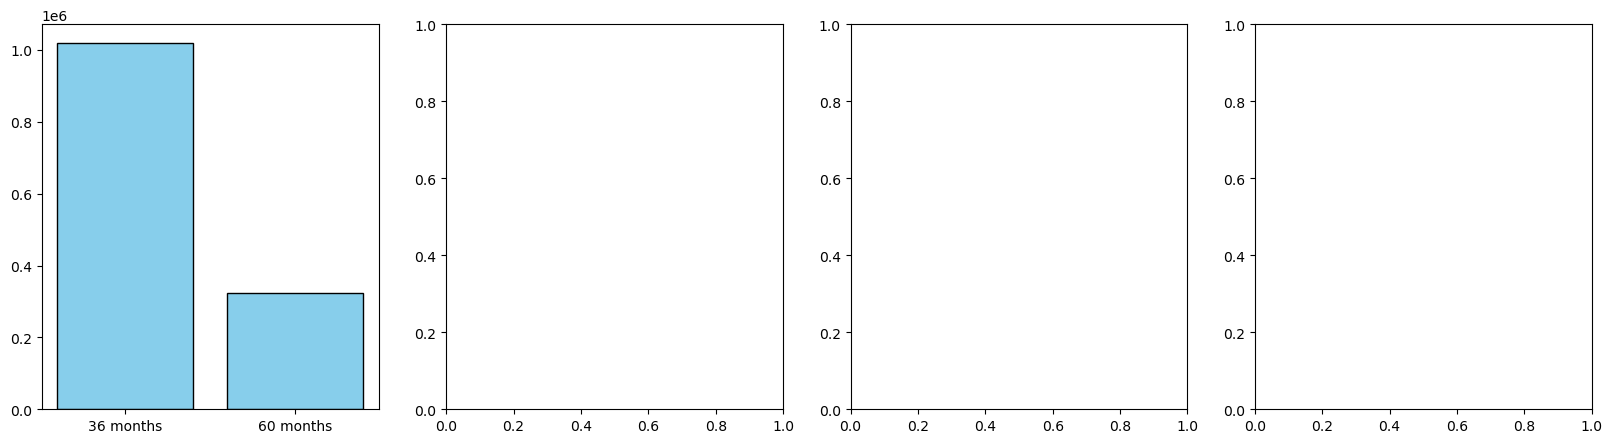

In [19]:
# Crear figura con 1 fila y 4 columnas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  

for i, var in enumerate(variables):
    tabla = df[var].value_counts().reset_index()
    tabla.columns = [var, "Count"]
    
    # Reemplazar valores con binary_maps
    tabla[var] = tabla[var].map(binary_maps[var])
    
    # Gráfico
    axes[i].bar(tabla[var], tabla["Count"], color="skyblue", edgecolor="black")
    axes[i].set_title(var_names[var], fontsize=12, fontweight="bold")
    axes[i].set_ylabel("Frecuencia")
    axes[i].set_xlabel("Categoría")
    axes[i].tick_params(axis='x', rotation=0)  # rotar etiquetas

# Ajustar espacios
plt.tight_layout()
plt.show()


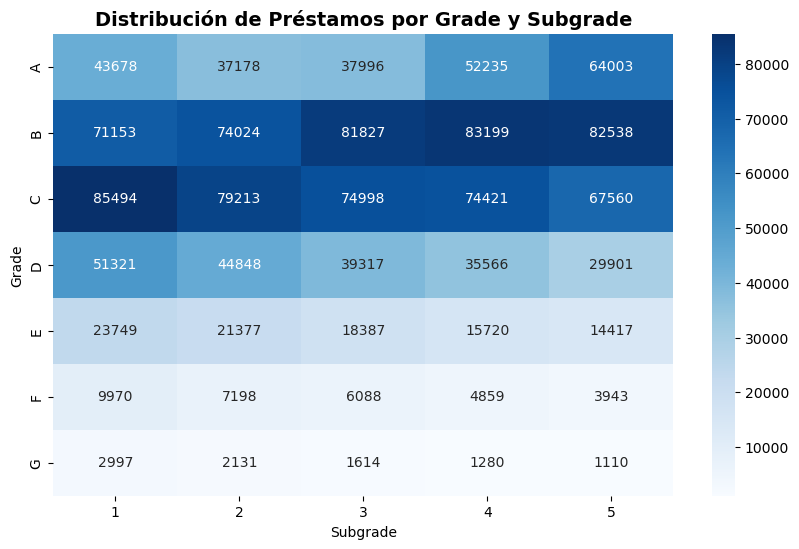

In [ ]:
# Crear tabla cruzada de frecuencia
tabla_g = pd.crosstab(df['grade'], df['sub_grade_num'])

# Graficar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_g, annot=True, fmt="d", cmap="Blues", cbar=True)

plt.title("Distribución de Préstamos por Grade y Subgrade", fontsize=14, fontweight="bold")
plt.xlabel("Subgrade")
plt.ylabel("Grade")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_18364\1046841379.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Hp\AppData\Local\Temp\ipykernel_18364\1046841379.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




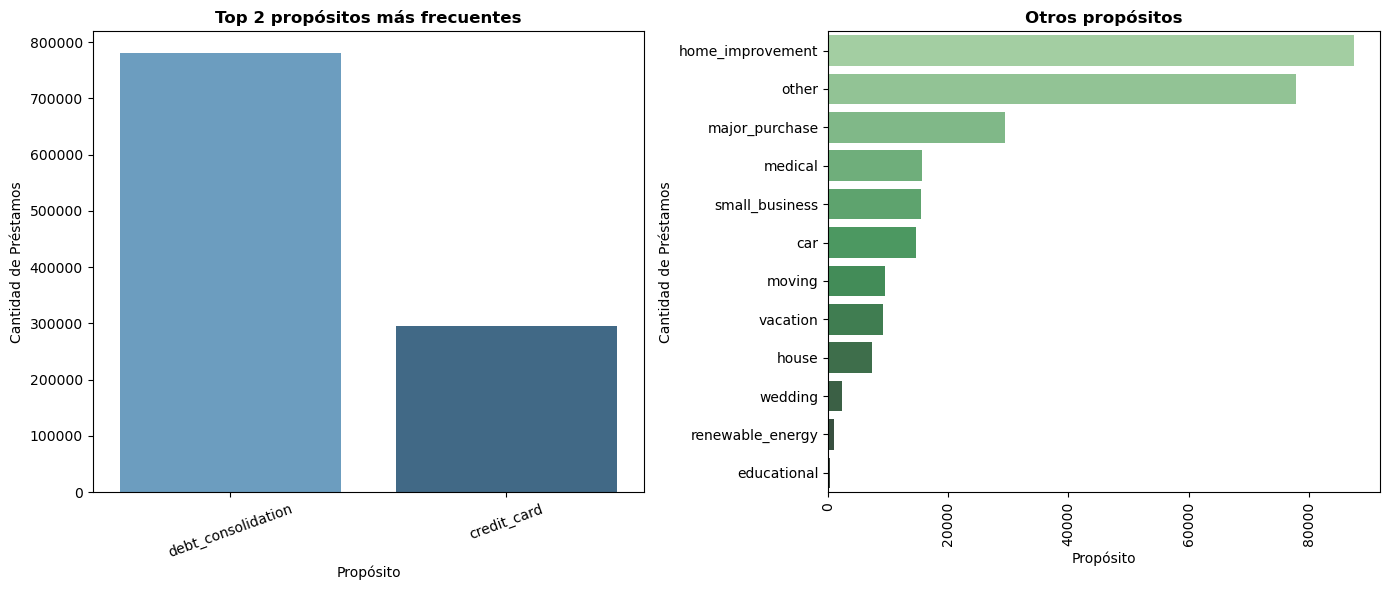

In [ ]:
# Conteo de purpose
conteo_purpose = df['purpose'].value_counts()

# Top 2 y el resto
top2 = conteo_purpose.head(2)
resto = conteo_purpose.iloc[2:]

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=False)

# Gráfico top 2
sns.barplot(x=top2.index, y=top2.values, palette="Blues_d", ax=axes[0])
axes[0].set_title("Top 2 propósitos más frecuentes", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Propósito")
axes[0].set_ylabel("Cantidad de Préstamos")
axes[0].tick_params(axis='x', rotation=20)

# Gráfico resto
sns.barplot(y=resto.index, x=resto.values, palette="Greens_d", ax=axes[1])
axes[1].set_title("Otros propósitos", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Propósito")
axes[1].set_ylabel("Cantidad de Préstamos")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
# Contar valores
gap_0 = (df['loan_gap'] == 0).sum()
gap_no_0 = (df['loan_gap'] != 0).sum()

# Crear tabla resumen
tabla_gap = pd.DataFrame({
    'loan_gap': ['Igual a 0', 'Distinto de 0'],
    'Cantidad': [gap_0, gap_no_0]
})

tabla_gap


,loan_gap,Cantidad
0,Igual a 0,1343389
1,Distinto de 0,1921


In [ ]:
# Resumen de variables numéricas 

var_info = ['loan_gap', 'installment', 'int_rate']
var_names = {
    'loan_gap': 'Monto solicitado - dado',
    'installment': 'Capacidad de pago',
    'int_rate': 'Tasa de interés anual'
}

resumen = []
for var in var_info:
    if var == 'loan_gap':
        datos = df[df['loan_gap'] != 0][var]
    else:
        datos = df[var]
    
    resumen.append({
        "Variable": var_names[var],
        "Mínimo": datos.min(),
        "Máximo": datos.max(),
        "Media": datos.mean(),
        "Desviación estándar": datos.std(),
        "25%": datos.quantile(0.25),
        "Mediana": datos.median(),
        "75%": datos.quantile(0.75),
    })
t_resumen_info = pd.DataFrame(resumen)
t_resumen_info


,Variable,Mínimo,Máximo,Media,Desviación estándar,25%,Mediana,75%
0,Monto solicitado - dado,25.00,21150.00,5893.440916,3459.717584,3300.00,5550.00,8075.00
1,Capacidad de pago,4.93,1719.83,438.075533,261.512604,248.48,375.43,580.73
2,Tasa de interés anual,5.31,30.99,13.239619,4.768716,9.75,12.74,15.99


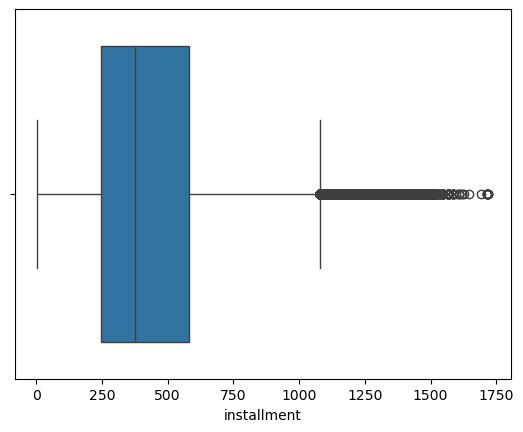

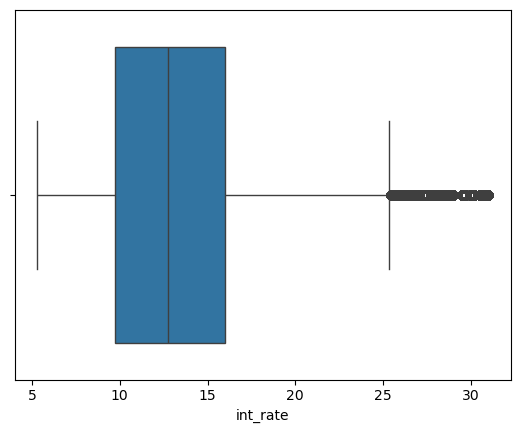

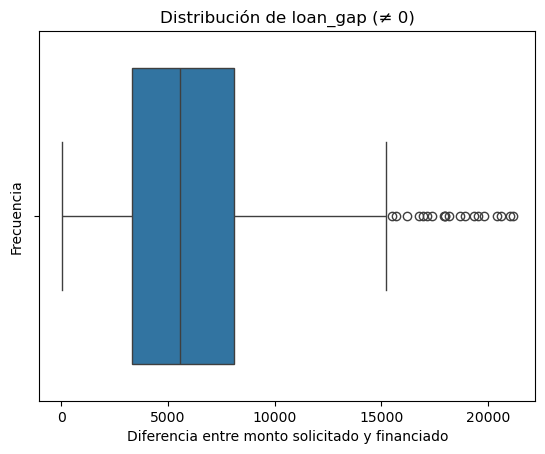

In [ ]:
# Gráfico tasa de interes anual

sns.boxplot(x=df['installment'])
plt.show()

sns.boxplot(x=df['int_rate'])
plt.show()

df_gap = df[df['loan_gap'] != 0]
sns.boxplot(x=df_gap['loan_gap'])
plt.title('Distribución de loan_gap (≠ 0)')
plt.xlabel('Diferencia entre monto solicitado y financiado')
plt.ylabel('Frecuencia')
plt.show()



### Información del prestadiario

In [ ]:
# Resumen de variables numéricas 

var_pres = ['fico_range_mean', 'dti']
var_names_p = {
    'fico_range_mean': 'Puntaje FICO',
    'dti': 'Debt to Income'
}

# Winsorizar al percentil 99
p99 = df['dti'].quantile(0.99)
df['dti'] = df['dti'].clip(upper=p99)

res = []
for var in var_pres:
    if var == 'dti':
        datos = df[(df['dti'] != -1) & (df['dti'] != 999)][var]
    else:
        datos = df[var]

    res.append({
        "Variable": var_names_p[var],
        "Mínimo": datos.min(),
        "Máximo": datos.max(),
        "Media": datos.mean(),
        "Desviación estándar": datos.std(),
        "25%": datos.quantile(0.25),
        "Mediana": datos.median(),
        "75%": datos.quantile(0.75),
    })
t_resumen_pres = pd.DataFrame(res)
t_resumen_pres


,Variable,Mínimo,Máximo,Media,Desviación estándar,25%,Mediana,75%
0,Puntaje FICO,627.0,847.50,698.185108,31.852836,672.00,692.00,712.00
1,Debt to Income,0.0,38.37,18.118733,8.432028,11.79,17.61,24.04


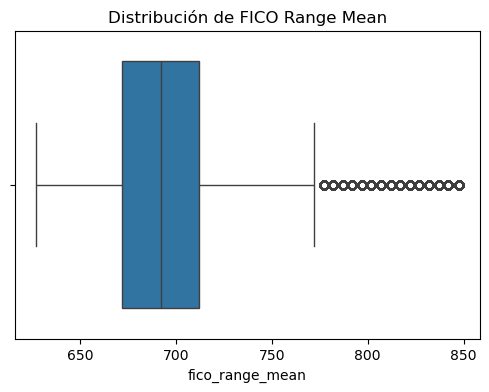

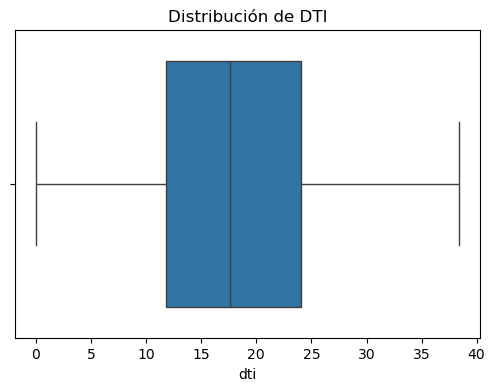

In [ ]:
# Histograma + KDE para FICO Range Mean
plt.figure(figsize=(6,4))
sns.boxplot(x=df["fico_range_mean"])
plt.title("Distribución de FICO Range Mean")
plt.show()


# Histograma para DTI
plt.figure(figsize=(6,4))
sns.boxplot(x=df["dti"])
plt.title("Distribución de DTI")
plt.show()


📊 Valores típicos de DTI en análisis crediticio
| Rango de DTI (%) | Interpretación financiera | 
| 0% – 15% | Baja carga financiera. Perfil muy saludable. | 
| 15% – 35% | Carga moderada. Aceptable para la mayoría de créditos. | 
| 35% – 45% | Carga elevada. Riesgo creciente. | 
| > 45% | Alta presión financiera. Riesgo de impago significativo. | 






### Historial crediticio

In [ ]:
df['earliest_cr_line_year'].dtype


dtype('int64')

In [ ]:
years = df["earliest_cr_line_year"].dropna().astype(int)  # quitamos nulos si los hay
n = len(years)
k_sturges = int(1 + np.log2(n))
# Rango de años
R = years.max() - years.min()
# Amplitud de clase
h = int(np.ceil(R / k_sturges))
# --- Crear límites de intervalos ---
min_year = years.min()
max_year = years.max()

# Creamos los intervalos
# Construimos bordes de clase
bins = list(range(min_year, max_year + h, h))

# Tabla de frecuencia agrupada
tabla = pd.cut(years, bins=bins, right=False).value_counts().sort_index()

tabla_frec = pd.DataFrame({
    "Intervalo": [f"[{int(interval.left)}, {int(interval.right)})" for interval in tabla.index],
    "Frecuencia": tabla.values,
})

print(tabla_frec)

       Intervalo  Frecuencia
0   [1934, 1938)           1
1   [1938, 1942)           0
2   [1942, 1946)           3
3   [1946, 1950)           5
4   [1950, 1954)          35
5   [1954, 1958)          67
6   [1958, 1962)         282
7   [1962, 1966)        1031
8   [1966, 1970)        2774
9   [1970, 1974)        5640
10  [1974, 1978)       11464
11  [1978, 1982)       19963
12  [1982, 1986)       43478
13  [1986, 1990)       76800
14  [1990, 1994)      114967
15  [1994, 1998)      207722
16  [1998, 2002)      316779
17  [2002, 2006)      328422
18  [2006, 2010)      161384
19  [2010, 2014)       51679
20  [2014, 2018)        2814


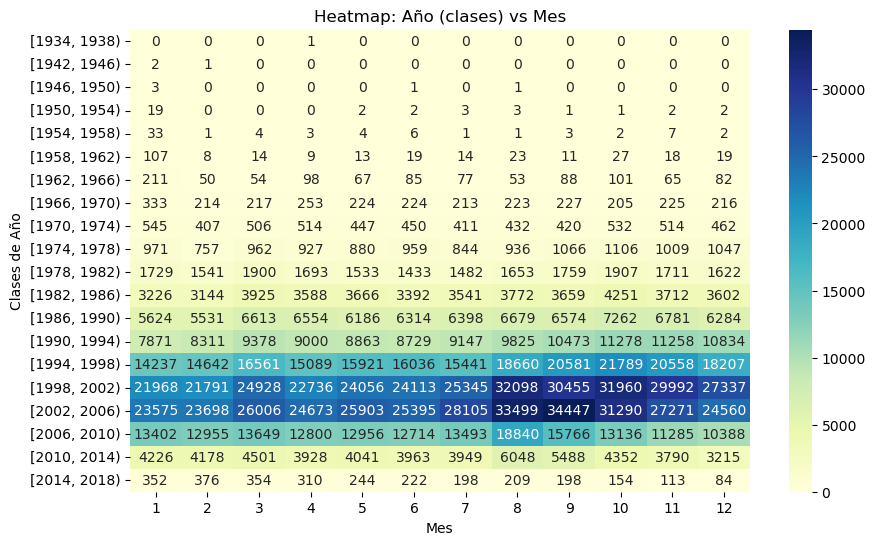

In [ ]:
df["year_class"] = pd.cut(df["earliest_cr_line_year"], bins=bins, right=False)

# --- 2. Agrupar por clase y mes ---
tabla = pd.crosstab(df["year_class"], df["earliest_cr_line_month"])

# --- 3. Graficar heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap: Año (clases) vs Mes")
plt.xlabel("Mes")
plt.ylabel("Clases de Año")
plt.show()